In [ ]:
!unzip "/content/drive/MyDrive/COMPUTER VISION-SUKAMAL JYOTI DAS/PRASAD.zip"

Streaming output truncated to the last 5000 lines.
 extracting: PRASAD/train/sad/Training_65267116.jpg  
 extracting: PRASAD/train/sad/Training_65275626.jpg  
 extracting: PRASAD/train/sad/Training_6529266.jpg  
 extracting: PRASAD/train/sad/Training_65329617.jpg  
 extracting: PRASAD/train/sad/Training_65338712.jpg  
 extracting: PRASAD/train/sad/Training_65338797.jpg  
 extracting: PRASAD/train/sad/Training_65387162.jpg  
 extracting: PRASAD/train/sad/Training_65404494.jpg  
 extracting: PRASAD/train/sad/Training_65426218.jpg  
 extracting: PRASAD/train/sad/Training_65430136.jpg  
 extracting: PRASAD/train/sad/Training_65437377.jpg  
 extracting: PRASAD/train/sad/Training_6545735.jpg  
 extracting: PRASAD/train/sad/Training_65463385.jpg  
 extracting: PRASAD/train/sad/Training_65473985.jpg  
 extracting: PRASAD/train/sad/Training_65502829.jpg  
 extracting: PRASAD/train/sad/Training_65505359.jpg  
 extracting: PRASAD/train/sad/Training_65508578.jpg  
 extracting: PRASAD/train/sad/Tra

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os
from matplotlib import pyplot as plt
import numpy as np


In [ ]:
#IMG_HEIGHT=48 
#IMG_WIDTH = 48
#batch_size=32
import os

base_dir='PRASAD'
train_data_dir='PRASAD/train'
test_data_dir='PRASAD/test'


train_angry_dir ='PRASAD/train/angry'
train_disgust_dir ='PRASAD/train/disgust'
train_fear_dir ='PRASAD/train/fear'
train_happy_dir ='PRASAD/train/happy'
train_neutral_dir ='PRASAD/train/neutral'
train_sad_dir ='PRASAD/train/sad'
train_surprise_dir ='PRASAD/train/surprise'



test_angry_dir ='PRASAD/test/angry'
test_disgust_dir ='PRASAD/test/disgust'
test_fear_dir ='PRASAD/test/fear'
test_happy_dir ='PRASAD/test/happy'
test_neutral_dir ='PRASAD/test/neutral'
test_sad_dir ='PRASAD/test/sad'
test_surprise_dir ='PRASAD/test/surprise'

In [ ]:
print('total train angry images:', len(os.listdir(train_angry_dir)))
print('total train disgust images:', len(os.listdir(train_disgust_dir)))
print('total train fear images:', len(os.listdir(train_fear_dir)))
print('total train happy images:', len(os.listdir(train_happy_dir)))
print('total train neutral images:', len(os.listdir(train_neutral_dir)))
print('total train sad images:', len(os.listdir(train_sad_dir)))
print('total train surprise images:', len(os.listdir(train_surprise_dir)))



print('total test angry images:', len(os.listdir(test_angry_dir)))
print('total test disgust images:', len(os.listdir(test_disgust_dir)))
print('total test fear images:', len(os.listdir(test_fear_dir)))
print('total test happy images:', len(os.listdir(test_happy_dir)))
print('total test neutral images:', len(os.listdir(test_neutral_dir)))
print('total test sad images:', len(os.listdir(test_sad_dir)))
print('total test surprise images:', len(os.listdir(test_surprise_dir)))




total train angry images: 3995
total train disgust images: 436
total train fear images: 4097
total train happy images: 7215
total train neutral images: 4965
total train sad images: 4830
total train surprise images: 3171
total test angry images: 958
total test disgust images: 111
total test fear images: 1024
total test happy images: 1774
total test neutral images: 1233
total test sad images: 1247
total test surprise images: 831


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir,target_size=(48,48),batch_size=32,color_mode='grayscale',class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_data_dir,target_size=(48,48),batch_size=32,color_mode='grayscale',class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


#Verify our generator by plotting a few faces and printing corresponding labels

In [ ]:
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

In [ ]:
img, label = train_generator.__next__()

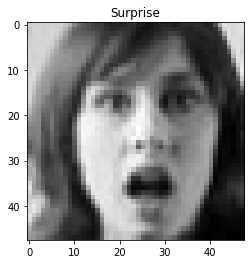

In [ ]:
import random
i=random.randint(0, (img.shape[0])-1)
image = img[i]
labl = class_labels[label[i].argmax()]
plt.imshow(image[:,:,0], cmap='gray')
plt.title(labl)
plt.show()


# Create the model

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [ ]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
#print(model.summary())

In [ ]:
train_path = "PRASAD/train"
test_path = "PRASAD/train"

In [ ]:
num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)

In [ ]:
num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)


In [ ]:
epochs=50
batch_size=32



history=model.fit(train_generator,
                steps_per_epoch=num_train_imgs//batch_size,
                epochs=epochs,
                validation_data=test_generator,
                validation_steps=num_test_imgs//batch_size)

Epoch 1/50
897/897 [==============================] - 24s 15ms/step - loss: 1.6465 - accuracy: 0.3425 - val_loss: 1.4079 - val_accuracy: 0.4610
Epoch 2/50
897/897 [==============================] - 11s 12ms/step - loss: 1.3423 - accuracy: 0.4850
Epoch 3/50
897/897 [==============================] - 12s 13ms/step - loss: 1.2131 - accuracy: 0.5371
Epoch 4/50
897/897 [==============================] - 11s 12ms/step - loss: 1.1195 - accuracy: 0.5747
Epoch 5/50
897/897 [==============================] - 11s 12ms/step - loss: 1.0402 - accuracy: 0.6062
Epoch 6/50
897/897 [==============================] - 11s 12ms/step - loss: 0.9613 - accuracy: 0.6386
Epoch 7/50
897/897 [==============================] - 11s 12ms/step - loss: 0.8772 - accuracy: 0.6713
Epoch 8/50
897/897 [==============================] - 11s 12ms/step - loss: 0.7936 - accuracy: 0.7023
Epoch 9/50
897/897 [==============================] - 11s 12ms/step - loss: 0.7241 - accuracy: 0.7315
Epoch 10/50
897/897 [===================

In [ ]:
model.save('emotion_detection_model_100epochs.h5')

#plot the training and testing accuracy and loss at each epoch

ValueError: ignored

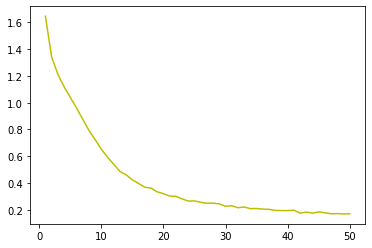

In [ ]:
#epochs=50
#loss = history.history['loss']
#val_loss = history.history['val_loss']
#epochs = range(1, len(loss) + 1)
#plt.plot(epochs, loss, 'y', label='Training loss')
#plt.plot(epochs, val_loss, 'r', label='Testing loss')
#plt.title('Training and Testing loss')
#plt.xlabel('Epochs')
#plt.ylabel('Loss')
#plt.legend()
#plt.show()

ValueError: ignored

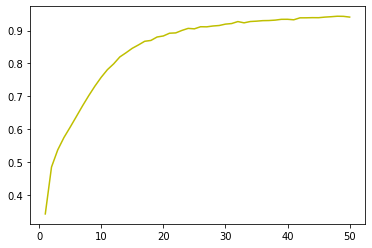

In [ ]:
#acc = history.history['accuracy']
#acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
#val_acc = history.history['val_accuracy']

#plt.plot(epochs, acc, 'y', label='Training acc')
#plt.plot(epochs, val_acc, 'r', label='Testing acc')
#plt.title('Training and Testing accuracy')
#plt.xlabel('Epochs')
#plt.ylabel('Accuracy')
#plt.legend()
#plt.show()


In [ ]:
from keras.models import load_model

In [ ]:
#Test the model
my_model = load_model('emotion_detection_model_100epochs.h5', compile=False)

In [ ]:
#Generate a batch of images
test_img, test_lbl = train_generator.__next__()
predictions=my_model.predict(test_img)

In [ ]:
predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_lbl, axis=1)

In [ ]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

Accuracy =  1.0


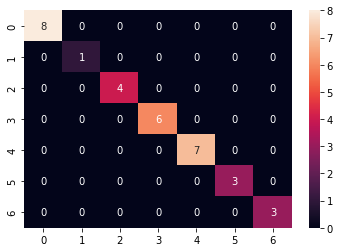

In [ ]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, predictions)
#print(cm)
import seaborn as sns
sns.heatmap(cm, annot=True)

class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

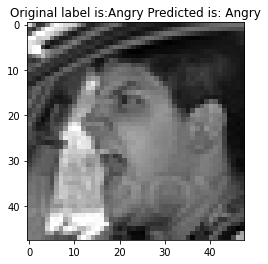

In [ ]:
#Check results on a few select images
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()